# Project 1_Aishwarya_Adiki_axa180100_AnalyzingSBADataSet

### Deliverables in a single zip file in the following structure:
- `notebook` (folder)
    - Jupyter notebook with complete code to manipulate data, train and tune final model. `ipynb` format.
    - Jupyter notebook with scoring function. `ipynb` format.
- `artifacts` (folder)
    - Model and any potential encoders in the "pkl" format or native H2O-3 format (for H2O-3 model)
    - Scoring function that will load the final model and encoders. Separate from above notebook or `.py` file



Your notebook should include explanations about your code and be designed to be easily followed and results replicated. Once you are done with the final version, you will need to test it by running all cells from top to bottom after restarting Kernel. It can be done by running `Kernel -> Restart & Run All`


**Important**: To speed up progress, first produce working code using a small subset of the dataset.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

!pip install category_encoders==2.6.0
!pip install pandoc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: category_encoders
    Found existing installation: category-encoders 2.6.3
    Uninstalling category-encoders-2.6.3:
      Successfully uninstalled category-encoders-2.6.3


In [2]:
!pip install pyspark

In [3]:
pip install --upgrade category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: category_encoders
    Found existing installation: category-encoders 2.6.0
    Uninstalling category-encoders-2.6.0:
      Successfully uninstalled category-encoders-2.6.0
Note: you may need to restart the kernel to use updated packages.


### Dataset preparation and clean-up

Modify and clean-up the dataset as following:
- Replace encode Na/Null values
- Convert the strings to floats/integers as needed

Any additional clean-up as you find fit.

In [5]:
df_sba  = pd.read_csv('SBA_loans_project_1.csv')

In [6]:
df_sba = df_sba.drop(columns=['index'])

#### Now I will Replace encode Na/Null values and 

In [8]:
categorical_columns=df_sba.select_dtypes(include=['object']).columns
df_sba[categorical_columns]=df_sba[categorical_columns].fillna('Missing')
df_sba=df_sba.fillna(0.0)

### Categorical and numerical variables encoding

Encode categorical variables using either one of the techniques below. Don't use LabelEncoder.
- One-hot-encoder for variables with less than 10 valid values. Name your new columns "Original_name"_valid_value. If you drop one of the columns, make it clear what valid value is reference value.
- Target encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_trg
- WOE encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_woe


WOE encoder can be used with numerical variables too. 


Example of use for target encoder:
```
import category_encoders as ce

encoder = ce.TargetEncoder(cols=[...])

encoder.fit(X, y)
X_cleaned = encoder.transform(X_dirty)
```

## USING 'MIS_Status' as the target column because there's only 2 levels (0 or 1) which would work nicely for the data we have

In [9]:
import category_encoders as ce 

# Defining Target Encoder
target_encoder=ce.TargetEncoder(cols=categorical_columns)

# Fitting Target Encoder on dataset
target_encoder.fit(df_sba[categorical_columns],df_sba['MIS_Status']) 
# Transforming dataset
df_sba_transformed = df_sba.join(target_encoder.transform(df_sba[categorical_columns]), lsuffix='', rsuffix='_trg')

display(df_sba_transformed) #Originalname_trg columns appended to the very right of the data frame, so please scroll to the far right

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,City_trg,State_trg,Bank_trg,BankState_trg,RevLineCr_trg,LowDoc_trg
0,APPLETON,WI,59414,ASSOCIATED BANK NATL ASSOC,WI,321918,26,1.0,0,0,1,0,0,N,100000.0,0.0,100000.0,80000.0,0,0.085349,0.119504,0.111863,0.116801,0.149026,0.186555
1,WEATHERFORD,TX,76086,REGIONS BANK,AL,621391,2,1.0,1,3,0,1,N,N,146200.0,0.0,146200.0,124270.0,0,0.137056,0.188210,0.083090,0.130599,0.146095,0.186555
2,FLORENCE,SC,29505,"SUPERIOR FINANCIAL GROUP, LLC",CA,236220,3,1.0,3,3,0,1,N,N,20000.0,0.0,20000.0,17000.0,1,0.173653,0.204237,0.726289,0.220324,0.146095,0.186555
3,BOSTON,MA,2124,CITIZENS BANK NATL ASSOC,RI,236115,5,1.0,0,5,1,1,N,N,73100.0,0.0,75000.0,37500.0,1,0.129880,0.128439,0.214448,0.197587,0.146095,0.186555
4,LAFAYETTE,IN,47904,THE HUNTINGTON NATIONAL BANK,OH,0,82,1.0,0,0,1,0,N,Y,80000.0,0.0,80000.0,64000.0,0,0.125934,0.174321,0.132007,0.158100,0.146095,0.089696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800250,FAIRFIELD,OH,45014,ACCESS BUS. DEVEL & FINANCE IN,OH,235920,3,1.0,5,0,1,0,N,N,145000.0,0.0,145000.0,145000.0,0,0.168250,0.163359,0.000001,0.158100,0.146095,0.186555
800251,COHOES,NY,12047,EMPIRE ST. CERT. DEVEL CORP,NY,541430,10,1.0,0,1,1,1,0,N,198000.0,0.0,198000.0,198000.0,0,0.113292,0.198622,0.000000,0.168238,0.149026,0.186555
800252,MANSFIELD,MA,2048,BANK OF AMERICA NATL ASSOC,RI,722320,3,1.0,0,3,1,1,0,N,10000.0,0.0,10000.0,5000.0,1,0.179039,0.128439,0.275751,0.197587,0.149026,0.186555
800253,WALLINGTON,NJ,7057,VALLEY NATIONAL BANK,NJ,447110,3,1.0,3,3,1,1,0,N,520000.0,0.0,520000.0,390000.0,0,0.214340,0.201609,0.125518,0.091147,0.149026,0.186555


In [10]:
df_sba_transformed = df_sba_transformed.drop(columns=['Zip', 'NAICS', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'DisbursementGross', 'BalanceGross',
       'GrAppv', 'SBA_Appv','City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc' ])

## STANDARD SCALER: 

In [11]:
import numpy as np
num_cols = df_sba.select_dtypes(include = np.number).columns
num_cols

Index(['Zip', 'NAICS', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'DisbursementGross', 'BalanceGross',
       'GrAppv', 'SBA_Appv', 'MIS_Status'],
      dtype='object')

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

scaler=StandardScaler()
numerical_variables=['Zip', 'NAICS', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'DisbursementGross', 'BalanceGross',
       'GrAppv', 'SBA_Appv']

StandardScaler = scaler.fit(df_sba[numerical_variables])

df_sba_sca = StandardScaler.transform(df_sba[numerical_variables])
df_sba_sca = pd.DataFrame(df_sba_sca, index=df_sba.index)
df_sba_sca = df_sba_sca.rename(columns={0: "Zip", 1: "NAICS", 2: "NoEmp", 3:'NewExist', 4:'CreateJob', 5:'RetainedJob',
       6:'FranchiseCode', 7:'UrbanRural', 8:'DisbursementGross', 9:'BalanceGross',
       10:'GrAppv', 11:'SBA_Appv'})

df_sba_transformed = df_sba_transformed.join(df_sba_sca)
covtype_df = df_sba_transformed.copy()
display(df_sba_transformed) ## FINAL STANDARDIZED DATAFRAME


,MIS_Status,City_trg,State_trg,Bank_trg,BankState_trg,RevLineCr_trg,LowDoc_trg,Zip,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv
0,0,0.085349,0.119504,0.111863,0.116801,0.149026,0.186555,0.180316,-0.290953,0.193751,-0.620218,-0.035640,-0.045517,-0.215971,-1.172094,-0.351298,-0.002135,-0.327034,-0.304182
1,0,0.137056,0.188210,0.083090,0.130599,0.146095,0.186555,0.714821,0.846463,-0.125393,-0.620218,-0.031424,-0.032884,-0.216049,0.374585,-0.190561,-0.002135,-0.163734,-0.109982
2,1,0.173653,0.204237,0.726289,0.220324,0.146095,0.186555,-0.778569,-0.616438,-0.112096,-0.620218,-0.022991,-0.032884,-0.216049,0.374585,-0.629631,-0.002135,-0.609804,-0.580546
3,1,0.129880,0.128439,0.214448,0.197587,0.146095,0.186555,-1.656405,-0.616837,-0.085500,-0.620218,-0.035640,-0.024461,-0.215971,0.374585,-0.444888,-0.002135,-0.415400,-0.490618
4,0,0.125934,0.174321,0.132007,0.158100,0.146095,0.089696,-0.188696,-1.513615,0.938422,-0.620218,-0.035640,-0.045517,-0.215971,-1.172094,-0.420881,-0.002135,-0.397727,-0.374370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800250,0,0.168250,0.163359,0.000001,0.158100,0.146095,0.186555,-0.281349,-0.617578,-0.112096,-0.620218,-0.014558,-0.045517,-0.215971,-1.172094,-0.194736,-0.002135,-0.167976,-0.019045
800251,0,0.113292,0.198622,0.000000,0.168238,0.149026,0.186555,-1.338273,0.542766,-0.019012,-0.620218,-0.035640,-0.041306,-0.215971,0.374585,-0.010341,-0.002135,0.019359,0.213452
800252,1,0.179039,0.128439,0.275751,0.197587,0.149026,0.186555,-1.658842,1.229797,-0.112096,-0.620218,-0.035640,-0.032884,-0.215971,0.374585,-0.664422,-0.002135,-0.645150,-0.633187
800253,0,0.214340,0.201609,0.125518,0.091147,0.149026,0.186555,-1.498253,0.184534,-0.112096,-0.620218,-0.022991,-0.032884,-0.215971,0.374585,1.109946,-0.002135,1.157510,1.055704


## Model Tuning

You should tune two types of models: one Sklearn and one H2O-3. Perform tuning for the selected model type from the set of Linear models available in Sklearn and H2O-3:
- Hyper-parameter tuning. Your hyper-parameter search space should have at least 50 combinations.
- To avoid overfitting and provide you with reasonable estimate of model performance on hold-out dataset, you will need to split your dataset as following:
    - Train, will be used to train model
    - Validation, will be used to validate model each round of training
    - Testing, will be used to provide final performance metrics, used only once on the final model
- Feature engineering. See project description

**Select final model that produces best performance on the Test dataset.**
- For the best model, calculate probability threshold to maximize F1. 

### The linear model I have selected is: logistic Regression.

### Splitting data:

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
target_col = "MIS_Status"
y = df_sba_transformed[target_col]
X = df_sba_transformed.drop(columns=[target_col])

X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4, random_state=142) # splitting into train and temp
X_test, X_valid, y_test, y_valid = train_test_split(X_temp,y_temp,test_size = 0.5, random_state=142) ## temp being split into test and validate sets

X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)
X_valid.reset_index(inplace=True, drop=True)
y_valid.reset_index(inplace=True, drop=True)

## HYPERPARAMETER TUNING: 5 X 4 X 4 X 1 = 80 COMBINATIONS:

In [50]:
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer 
import numpy as np
# Defining the hyperparameter space

param_grid = [    
    {'penalty' : ['l2'],
    'solver' : ['lbfgs','newton-cg','sag','saga'],
     'C': [10, 1.0, 0.1, 0.01],
    'max_iter' : [100, 150, 175, 200, 250]
    }
]

# Defining the scoring metric as F1 score
f1_scorer = make_scorer(f1_score,average='weighted')


## SKLEARN MODEL: 

In [15]:
# Initializing the Linear regression model: 
import warnings
warnings.filterwarnings('ignore')
logModel = LogisticRegression()

# Performing Grid Search
grid_search = GridSearchCV(logModel, param_grid = param_grid, verbose = True, cv=2, n_jobs=-1) # pds used the validatio data set at each model
grid_search.fit(X_train,y_train)


Fitting 2 folds for each of 80 candidates, totalling 160 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [10, 1.0, 0.1, 0.01],
                          'max_iter': [100, 150, 175, 200, 250],
                          'penalty': ['l2'],
                          'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}],
             verbose=True)

### Please ignore the warnings above. They occur due to non convergence issues, but they are not errors

In [51]:
from sklearn.metrics import f1_score, make_scorer 
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Getting the best model parameters 
best_params=grid_search.best_params_

# Getting the best F1 score
best_f1=grid_search.best_score_

# Get the confusion matrix for the best model
y_pred=grid_search.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print("Best Parameters:",best_params)
print("Best F1 Score:",best_f1)
print("Confusion Matrix:")
print(cm)

Best Parameters: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 Score: 0.83486097185776
Confusion Matrix:
[[128691   3368]
 [ 23150   4842]]


In [56]:
y_pred_proba = grid_search.predict_proba(X_test)[::,1]

#calculate AUC of mode
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#print AUC score
print("AUC Score: ", auc)

AUC Score:  0.7702116835434315


#### From this we can see that the best parameters are: C value of 10, max iterations of 200, a penalty of l2, and the lbfgs solver. 
#### These parameters give us the F1 score of 0.83486. The F1 score ranges between 0 and 1, with 0 denoting the lowest possible result and 1 denoting a flawless result, meaning that the model accurately predicted each label. A high F1 score generally indicates a well-balanced performance, demonstrating that the model can concurrently attain high precision and high recall. 
#### Therefore an F1 Score of 0.83486 can be considered good
#### Furthermore, the AUC is 0.7702, which is moderately good and feasible
#### Probablity threshold = 0.9

In [59]:
# df_sba_transformed
def train_model(data):
    target_col = "MIS_Status"
    cols_to_drop = ['MIS_Status']
    y = data[target_col]
    X = data.drop(columns=[target_col])
    
    threshold = 0.9
    clf = LogisticRegression(max_iter=200, C = 10, penalty = 'l2', solver = 'lbfgs')
    
    columns_to_train = [x for x in X.columns if x not in cols_to_drop]
    print("Training on following columns:", columns_to_train)
    clf.fit(X[columns_to_train], y)
    
    artifacts_dict = {
        "model": clf,
        "categorical_columns": categorical_columns,
        "numerical_variables" : numerical_variables,
        "StandardScaler" : StandardScaler,
        "columns_to_train":columns_to_train,
        "target_encoder" : target_encoder,
        "threshold": threshold
    }
    import os
    import sys
    import pickle
    projectabspathname = os.path.abspath('Aishwarya_Adiki_axa180100_Project-1.pickle')
    projectname = 'Aishwarya_Adiki_axa180100_Project-1.ipynb'
    projectpickle = open(str(projectabspathname),'wb')
    pickle.dump(obj=artifacts_dict, file=projectpickle)
    projectpickle.close()  
    return clf
    

In [60]:
train_model(df_sba_transformed)

Training on following columns: ['City_trg', 'State_trg', 'Bank_trg', 'BankState_trg', 'RevLineCr_trg', 'LowDoc_trg', 'Zip', 'NAICS', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']


LogisticRegression(C=10, max_iter=200)

In [65]:
bestmodel = LogisticRegression(max_iter=200, C = 10, penalty = 'l2', solver = 'lbfgs')
bestmodel.fit(X, y)
print('intercept ', bestmodel.intercept_[0])
print('classes', bestmodel.classes_)
pd.DataFrame({'coeff': bestmodel.coef_[0]}, 
             index=X.columns)

intercept  -4.64397811137711
classes [0 1]


,coeff
City_trg,5.575750
State_trg,-0.556621
Bank_trg,4.872677
BankState_trg,0.686155
RevLineCr_trg,2.350303
LowDoc_trg,2.894063
Zip,0.074891
NAICS,-0.008645
NoEmp,-0.071180
NewExist,0.077562


In [78]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
best_dtc = grid_search.best_estimator_ 
# Calculate permutation importance using the best model
result = permutation_importance(best_dtc, X, y, n_repeats=30, random_state=42)

feature_importances = result.importances_mean
feature_names = X.columns

for feature, importance in zip(feature_names, feature_importances):
    print(f'{feature}: {importance}')


City_trg: 0.007164799553475642
State_trg: -3.040697444358272e-05
Bank_trg: 0.01966823075144796
BankState_trg: 9.842695973989827e-05
RevLineCr_trg: 0.0014720724435752601
LowDoc_trg: 0.0003583441111478828
Zip: 0.0003506382340628685
NAICS: -3.061524139183295e-05
NoEmp: 1.5120180442462771e-05
NewExist: 1.932717279697164e-05
CreateJob: 0.0005977261414590577
RetainedJob: 0.0003063606808662874
FranchiseCode: 2.6574862595859135e-05
UrbanRural: 0.001989574156570902
DisbursementGross: 0.00012987526892468035
BalanceGross: 2.499203378913961e-07
GrAppv: 0.007818632810791534
SBA_Appv: 0.00863503924790638


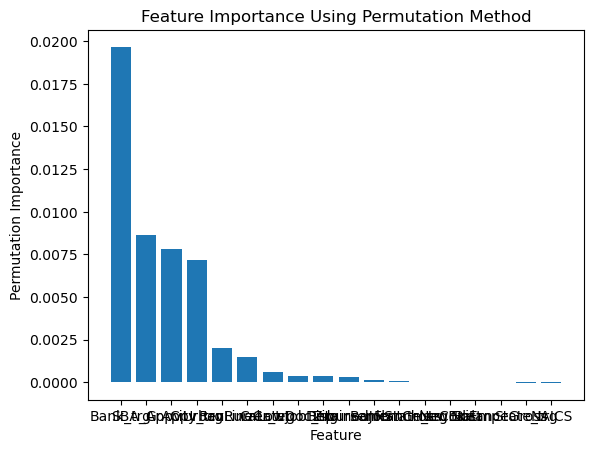

<Figure size 500x100 with 0 Axes>

In [79]:
# Plotting feature importances
sorted_idx = feature_importances.argsort()[::-1]
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], tick_label=feature_names[sorted_idx])
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Feature Importance Using Permutation Method')
plt.figure(figsize=(5,1))
plt.show()

## H20-3 Model:

In [18]:
pip install h2o

Note: you may need to restart the kernel to use updated packages.


In [19]:
import h2o

In [21]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "17.0.7" 2023-04-18; OpenJDK Runtime Environment Temurin-17.0.7+7 (build 17.0.7+7); OpenJDK 64-Bit Server VM Temurin-17.0.7+7 (build 17.0.7+7, mixed mode, sharing)
  Starting server from /opt/anaconda3/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/hd/qln9g6n51snggb5qgwn55w9c0000gn/T/tmpq5pm_p3o
  JVM stdout: /var/folders/hd/qln9g6n51snggb5qgwn55w9c0000gn/T/tmpq5pm_p3o/h2o_aishwaryaadiki_started_from_python.out
  JVM stderr: /var/folders/hd/qln9g6n51snggb5qgwn55w9c0000gn/T/tmpq5pm_p3o/h2o_aishwaryaadiki_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_aishwaryaadiki_1fcysx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


In [22]:
X_train_h2o = X_train.join(y_train)

In [23]:
X_train_h2o = h2o.H2OFrame(X_train_h2o)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [24]:
X_test_h2o = X_test.join(y_test)
X_test_h2o = h2o.H2OFrame(X_test_h2o)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [25]:
X_valid_h2o = X_valid.join(y_valid)
X_valid_h2o = h2o.H2OFrame(X_valid_h2o)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [26]:
response = "MIS_Status"

In [27]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid import H2OGridSearch
alpha_list = [0.05,0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.9]
lambda_list = [0.1, 0.2,0.3,0.4,0.5]
glm_hyper_params = { 'alpha': [0.05,0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.9], 
                     'lambda': [0.1,0.05,0.01, 0.2,0.3,0.4,0.5]}

### 9 alpha values and 7 lambda values = 63 combinations for hyperparameters =

In [28]:
grid_search_criteria = { 'strategy': "RandomDiscrete", 
                    'seed': 142,
                    'stopping_metric': "AUC", 
                    'stopping_tolerance': 0.01,
                    'stopping_rounds': 5 }

In [29]:
#Prepare predictors and response columns
predictors = X_train_h2o.columns
predictors.remove("MIS_Status")
print("Predictor columns:", predictors)
print("Respomse columns:", response)

Predictor columns: ['City_trg', 'State_trg', 'Bank_trg', 'BankState_trg', 'RevLineCr_trg', 'LowDoc_trg', 'Zip', 'NAICS', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']
Respomse columns: MIS_Status


In [30]:
glm_grid = H2OGridSearch(model=H2OGeneralizedLinearEstimator,
                     hyper_params=glm_hyper_params,
                     search_criteria=grid_search_criteria,
                     grid_id="SBAloans_glm_grid7")

glm_grid.train(x=predictors, y=response, training_frame=X_train_h2o, validation_frame = X_valid_h2o,
              nfolds = 2, family = "binomial", fold_assignment="auto", seed=142, )

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,alpha,lambda,model_ids,logloss
,0.05,0.01,SBAloans_glm_grid7_model_4,0.3930122
,0.1,0.01,SBAloans_glm_grid7_model_2,0.3931789
,0.7,0.01,SBAloans_glm_grid7_model_7,0.3967745
,0.9,0.01,SBAloans_glm_grid7_model_15,0.3981886
,0.05,0.05,SBAloans_glm_grid7_model_6,0.4008775
,0.1,0.05,SBAloans_glm_grid7_model_16,0.4027881
,0.05,0.1,SBAloans_glm_grid7_model_12,0.4106207
,0.5,0.05,SBAloans_glm_grid7_model_17,0.4240252
,0.05,0.3,SBAloans_glm_grid7_model_10,0.4380749
,0.4,0.1,SBAloans_glm_grid7_model_1,0.4453240


In [32]:
# Get the grid results, sorted by validation AUCPR
gridperf1 = glm_grid.get_grid(sort_by='auc', decreasing=True)
gridperf1

,alpha,lambda,model_ids,auc
,0.1,0.01,SBAloans_glm_grid7_model_2,0.7710537
,0.05,0.01,SBAloans_glm_grid7_model_4,0.7709979
,0.7,0.01,SBAloans_glm_grid7_model_7,0.7690640
,0.9,0.01,SBAloans_glm_grid7_model_15,0.7685365
,0.1,0.05,SBAloans_glm_grid7_model_16,0.7674197
,0.05,0.05,SBAloans_glm_grid7_model_6,0.7672548
,0.05,0.1,SBAloans_glm_grid7_model_12,0.7649207
,0.05,0.3,SBAloans_glm_grid7_model_10,0.7639241
,0.05,0.4,SBAloans_glm_grid7_model_13,0.7621514
,0.5,0.05,SBAloans_glm_grid7_model_17,0.7515496


In [33]:
# Grab the top model, chosen by validation AUC
best_grid = gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_grid_perf = best_grid.model_performance(X_test_h2o)

print("Best Model performance (AUC) on test dataset: ")
best_grid_perf.auc()

Best Model performance (AUC) on test dataset: 


0.7693238928789832

### What is the best set of parameters for the logistic regression model using AUC metric?
    The best parameters are an alpha value of 0.1, and a lambda value of 0.01
### What is the best model performance (AUC) on the X_valid_h2o validation dataset?
    Validation AUC value of 0.7710537 for SBAloans_glm_grid7_model_2
### What is the best model performance (AUC) on a test dataset?
    Test AUC value is 0.7693239
### Produce Confusion Matrix using best F1 probability threshold

In [34]:
best_grid_perf.confusion_matrix()

,0,1,Error,Rate
0,105438.0,26621.0,0.2016,(26621.0/132059.0)
1,11778.0,16214.0,0.4208,(11778.0/27992.0)
Total,117216.0,42835.0,0.2399,(38399.0/160051.0)


### In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable. 
### Additionally, The AUC is meaningful as a diagnostic test only when it is > 0.5. The larger the value, the better the overall performance of the test.
### Hence, an auc value of 0.7711 for logistic regression is good for the data set given.

In [ ]:
h2o.shutdown()

## <span style="color:red"> **PROJECT 1 REPORT/CONCLUSION:** </span>

### <span style="color:blue"> **Summary of your work:** </span>



- I started the project by loading the data set as required and cleaning up the data as needed. Most of the code is commented on and/or markdown cells have been used to further explain my ideas. 
- There's no unnecessary code or text in all files, and any output is there because I deemed it would be necessary to understand my work. As such, things were kept as brief and succinct as possible.
- For this project, I used a target encoder for categorical columns and a Standard scaler to standardize numerical columns
- I then trained a logistic regression Sklearn model and a GLM binomial model using H2O.
- For logistic regression using Sklearn:
  - param_grid = [    
    {'penalty' : ['l2'],
    'solver' : ['lbfgs','newton-cg','sag','saga'],
     'C': [10, 1.0, 0.1, 0.01],
    'max_iter' : [100, 150, 175, 200, 250]
    }]
  - Total number of combinations for tuning the model: 1 X 4 X 4 X 5 = 80 combinations
- For GLM modeling using H2O:
  - glm_hyper_params = { 'alpha': [0.05,0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.9], 
                     'lambda': [0.1,0.05,0.01, 0.2,0.3,0.4,0.5]}
  - Total number of combinations for tuning the model: 9 X 7 = 63 combinations.
  - Number of folds = 2, so 63/2 = 41 unique models
- F1 score and AUC were included in the model results for the logistic regression sklearn model, whereas only the AUC metric was used for the H2O GLM model.
- Then a train_model function was created to export the ipynb file as a pkl file containing the following artifacts:
  - artifacts_dict = {
        "model": clf,
        "categorical_columns": categorical_columns,
        "numerical_variables" : numerical_variables,
        "StandardScaler": StandardScaler,
        "columns_to_train":columns_to_train,
        "target_encoder" : target_encoder,
        "threshold": threshold
    }
- Lastly, in a new ipynb notebook, a scaling function was created to evaluate the results for the SBA_loans_project_1_holdout_students_valid dataset
- As required, the submission has been packaged into a single zip file called Project1_Aishwarya_Adiki_axa180100


### <span style="color:blue"> **Summary of your findings and model performance:** </span>
- For logistic regression using sklearn, quite a few warnings occurred due to the discrepancy between the type of model it was and the number of interactions it required. These warnings occurred due to non-convergence issues, but they were not errors. Probably occurred due to depracation
- The probability threshold for logistic regression was found to be 0.9.
- **Logistic Regression using Sklearn:**
  - Best Parameters: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
  - Best F1 Score: 0.8348609718577
  - Confusion Matrix:
     [128691   3368]
     [ 23150   4842]
  - AUC Score:  0.7702116835434315
  - From this, we can see that the best parameters give us the F1 score of 0.83486. The F1 score ranges between 0 and 1, with 0 denoting the lowest possible result and 1 denoting a flawless result, meaning that the model accurately predicted each label. A high F1 score generally indicates a well-balanced performance, demonstrating that the model can concurrently attain high precision and high recall.
  - Therefore an F1 Score of 0.83486 can be considered good. Furthermore, the AUC is 0.77021, which is moderately good and feasible as well
- **GLM model using H2O:**
  - Since there are only two levels (0 or 1) in the target/response column of "MIS_Status", I used binomial family classification to train the model using the hyperparameters mentioned earlier in the report.
  - Hyper-Parameter Search Summary was ordered by increasing logloss and decreasing AUC. I considered the AUC metric as it was more appropriate for the imbalanced datasets provided to me
  - The best parameters were an alpha value of 0.1, and a lambda value of 0.01 with a validation AUC value of 0.7710537 for SBAloans_glm_grid7_model_2 as shown in cell output above
  - Though not shown in this notebook, I went to try a family classification of Gaussian and Poisson, but they yielded lower AUC values. Hence I decided to go with binomial GLM in the end.
  The Test dataset's AUC value was 0.7693239, which was very close to the validation AUC value of 0.7710537. This shows that the modeling was done as accurately as possible.
  - Additionally, I also produced a Confusion Matrix using the best F1 probability threshold, which is as follows:
  - Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21630599656544539
  - To look at the whole matrix, please scroll to the appropriate output cell.
  - In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable.
  - Additionally, The AUC is meaningful as a diagnostic test only when it is > 0.5. The larger the value, the better the overall performance of the test. Hence, an auc value of 0.7711 for a GLM model is good for the data set given.

##### **Comparing the Sklearn model vs H2O model:**
- After tuning **both models**, the best parameters for each yielded the **same AUC value of 0.771**.
- This makes perfect sense because mathematically speaking Logistic regression is a binomial regression with the "logistic" link function.
- Furthermore, this also demonstrates the consistency between the two models and goes to show that if trained right, we will get to the same answer regardless of using sklearn, h2o, or any other tool/library
- For the scoring function, I decided to use the sklearn model only because I am more familiar with it. That is a personal bias rather than a computational one.

### <span style="color:blue"> **Summary of your recommendations:** </span>
- I can make some recommendations based on sklearn's logistic regression model.
  1. Based on Feature Importance Using Permutation Method bar plot, we can see that certain features are more important than others and naturally will have more impact on the MIS_Status ( 0 = loan has been written off as a loss, or 1 = Small Business Successfully paid off the loan)
  2. City_trg: 0.007164799553475642, Bank_trg: 0.01966823075144796, RevLineCr_trg: 0.0014720724435752601, UrbanRural: 0.001989574156570902, GrAppv: 0.007818632810791534, SBA_Appv: 0.00863503924790638 are the 6 most important features according to the model.
  3. The city that the small business is located in is very important in addition to whether that place is urban or rural. After all, the busier a city, the more likely the small business is likely to get customers. This means that they have a higher chance of making a profit and thereby paying off the loan (MIS_Status would become 1 for Paid in Full)
  4. Furthermore, Small Business Loan Approval (SBA_Appv) and Bank name are also important. The higher the loan preapproval from a well-reputed bank the more likely that the small business can pay off the loan in the future. Big/popular banks thoroughly perform a financial and background check before handing out loans. This means that they likely won't give you a loan if you have bad financials or collaterals. The banks and loan pre-approvers want to make sure their loan is as safe as possible and likely to be returned.
  5. Additionally, by looking at the **coefficient for NoEmp**, we can see that with every additional employee hired, the loan is less likely to be paid off. This could be due to the fact that hiring employees costs money and will increase the expenses of the small business. At the same time, a small business most likely needs to hire at least 1 or 2 employees to keep things running, so this might prove to be a dilemma for owners.
  6. Likewise, the signs on the coefficients on variables BalanceGross (outstanding loan amount) and DisbursementGross (Loan Amount originally given to the Small business) tell us that as Balance Gross increases, the less likely the small business becomes to pay off the loan (leads to MIS_Status of 0).
  7. Similarly, as the original DisbursementGross increases (meaning the small business took a very big loan to begin with), the likelihood that the small business pays off the loan decreases(leads to MIS_Status of 0).
 
As such, for the reasons listed above, I recommend that a small business owner start their business in a booming, urban city. Furthermore, I would recommend that they not start a business until they have good financial statements and collaterals to show to the bank. This can ensure better interest rates, which means that the debt amount would decrease contingent upon the fact that loan payments are made in a timely manner. Additionally, I would recommend the small business start off with few employees and upsize or downsize on its workforce as needed to reduce annual business operation expenses. Lastly, I would recommend the business to take out only as much loan as is required. Sometimes, if the financial background of the borrower is good, the bank gets ready to approve as much as it possibly can. However, the business may not actually need all that money. So I suggest that business owners stay wary of this and not fall into the pothole of borrowing more than what's required. The more loan you have, the longer and harder it is to pay it off.